In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: >

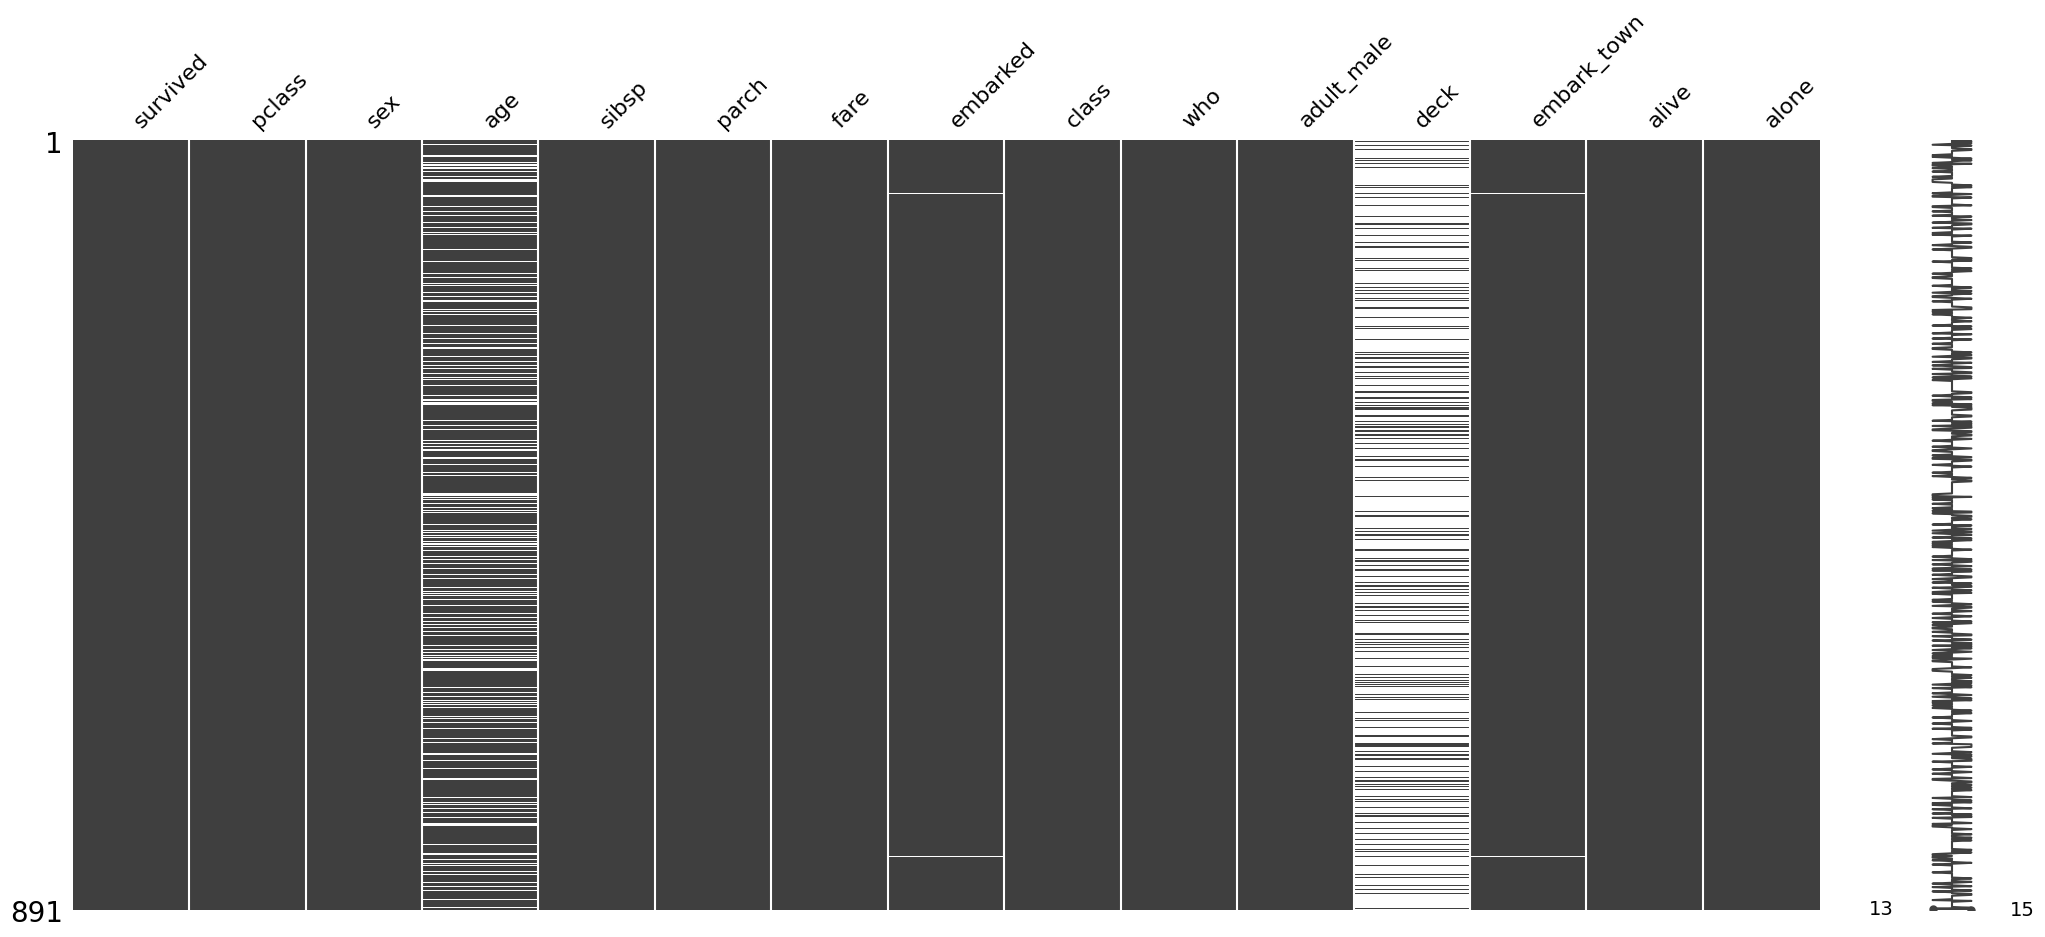

In [ ]:
# 결측치 시각화 라이브러리
!pip install missingno
import missingno as msno
msno.matrix(df)

In [ ]:
df['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
# isnull()
# notnull()

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# 누락데이터 제거
df_thres = df.dropna(axis = 1, thresh= 500)
df_thres.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# age열에 나이 데이터가 없는 모든 행 삭제(177개의 na)
df_age = df.dropna(subset=['age'],axis=0)
len(df_age)

714

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 비어있는 나이값을 평균으로 대체
mean_age = df['age'].mean()
df['age'].fillna(mean_age,inplace=True)

In [ ]:
# 승선도시 embark_town
# 범주형 데이터는 최빈값으로 변경..
most_freq =  df['embark_town'].value_counts().idxmax()
df['embark_town'].fillna(most_freq,inplace=True)

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

데이터의 특성상 서로 이웃한 데이터끼지 유사성을 가질수 있다

In [ ]:
df = sns.load_dataset('titanic')
df[df['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [ ]:
df['embark_town'].fillna(method='ffill',inplace=True)

In [ ]:
df.loc[59:63]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,Cherbourg,yes,True
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False
63,0,3,male,4.0,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False


중복데이터

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'c1':['a','a','b','a','b'],
    'c2':[1,1,1,2,2],
    'c3':[1,1,2,2,2],
})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [ ]:
df_dup = df.duplicated()
df_dup

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [ ]:
col_dup = df['c2'].duplicated()
df[col_dup]

,c1,c2,c3
1,a,1,1
2,b,1,2
4,b,2,2


In [ ]:
# 제거  dropna와 사용법이 같은
df.drop_duplicates() # 전체 row가 중복
df.drop_duplicates(subset=['c2','c3'])

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


데이터 표준화
  - 단위를 맞추는 작업

In [2]:
import pandas as pd
df = pd.read_csv('/content/auto-mpg.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
df.columns = ['mpg','cyliners','dispalcemant','horsepower','weight','acceleration','model_year','origin','name']

In [4]:
df.head()

,mpg,cyliners,dispalcemant,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


단위환산

In [6]:
# 기존데이터에서 새로운 데이터를 생성하면 좋다...
# mpg(mile per gallon) -> kpl(kilomiter per litter)   mpg_to_kpl = 0.425
mpg_to_kpl = 0.425
df['kpi'] = df['mpg']*mpg_to_kpl
df['kpi'] =df['kpi'].round(2)  # 소수점 둘재자리에서 반 올림
df.head()

,mpg,cyliners,dispalcemant,horsepower,weight,acceleration,model_year,origin,name,kpi
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.22


자료형 변환
  - 숫자가 문자형으로 저장된 경우- 숫자형(int, float)으로 변환
  - dtypes를 사용

In [7]:
df.dtypes

mpg             float64
cyliners          int64
dispalcemant    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
name             object
kpi             float64
dtype: object

In [13]:
pd.DataFrame([df.dtypes,df.iloc[0] ] )

,mpg,cyliners,dispalcemant,horsepower,weight,acceleration,model_year,origin,name,kpi
Unnamed 0,float64,int64,float64,object,float64,float64,int64,int64,object,float64
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65


In [14]:
# 숫자형 문자 -> 숫자  horsepower
# 숫자로된 범주형 - > 범주형 model_year, origin

In [15]:
# 숫자형인데.. object로 되어 있다는 애기는 숫자로 표현할수 없는 데이터가 포함되어 있기때문

In [16]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [18]:
import numpy as np
df['horsepower'].replace('?',np.nan, inplace=True)

In [19]:
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [30]:
df['origin'].unique()   # 1: USA 2:EU 3 JPN
origin_map = {1:'USA',2:'EU',3:'JPN'}
df['origin'].replace(origin_map, inplace=True)
df['origin'] = df['origin'].astype('category')

In [29]:
df['model_year'] = df['model_year'].astype('category')

In [31]:
df.dtypes

mpg              float64
cyliners           int64
dispalcemant     float64
horsepower       float64
weight           float64
acceleration     float64
model_year      category
origin          category
name              object
kpi              float64
dtype: object

연속형 데이터 범주형으로 처리 구간을 나눔
  - 나이, 키 , 몸무게

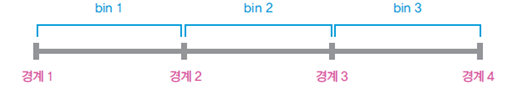

In [32]:
# horse power를 구간을 나눠서 범주형 데이터컬럼 추가

In [33]:
count, bin_drivers =  np.histogram(df['horsepower'], bins=3)
count, bin_drivers

(array([257, 103,  32]),
 array([ 46.        , 107.33333333, 168.66666667, 230.        ]))

In [ ]:
bin_names = ['저출력','보통출력','고출력']
df['hp_bin']=pd.cut(x=df['horsepower'],bins=bin_drivers,labels=bin_names,include_lowest=True)

In [35]:
df.head()

,mpg,cyliners,dispalcemant,horsepower,weight,acceleration,model_year,origin,name,kpi,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,7.65,보통출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,6.38,보통출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,7.65,보통출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,6.80,보통출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,7.22,보통출력


In [36]:
df.tail()

,mpg,cyliners,dispalcemant,horsepower,weight,acceleration,model_year,origin,name,kpi,hp_bin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,ford mustang gl,11.48,저출력
394,44.0,4,97.0,52.0,2130.0,24.6,82,EU,vw pickup,18.70,저출력
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage,13.60,저출력
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger,11.90,저출력
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA,chevy s-10,13.18,저출력


In [37]:
# 머신러닝에서 사용하려면... 범주형 데이터는 수치형으로 표현

더미변수
  - 0과 1로 표현되는 변수
  - get_dummies()

In [39]:
horsepower_dummies =  pd.get_dummies(df['hp_bin'])
horsepower_dummies.head(15)

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [41]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [42]:
le = LabelEncoder()
oh = OneHotEncoder()
hp_bin_labeling = le.fit_transform( df['hp_bin'] )
hp_bin_labeling

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,

In [48]:
hp_bin_onehot = oh.fit_transform( np.array(df['hp_bin']).reshape(-1,1) )
print(hp_bin_onehot)

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 2)	1.0
  (17, 2)	1.0
  (18, 2)	1.0
  (19, 2)	1.0
  (20, 2)	1.0
  (21, 2)	1.0
  (22, 2)	1.0
  (23, 1)	1.0
  (24, 2)	1.0
  :	:
  (367, 2)	1.0
  (368, 2)	1.0
  (369, 2)	1.0
  (370, 2)	1.0
  (371, 2)	1.0
  (372, 2)	1.0
  (373, 2)	1.0
  (374, 2)	1.0
  (375, 2)	1.0
  (376, 2)	1.0
  (377, 2)	1.0
  (378, 2)	1.0
  (379, 2)	1.0
  (380, 1)	1.0
  (381, 2)	1.0
  (382, 2)	1.0
  (383, 1)	1.0
  (384, 2)	1.0
  (385, 2)	1.0
  (386, 2)	1.0
  (387, 2)	1.0
  (388, 2)	1.0
  (389, 2)	1.0
  (390, 2)	1.0
  (391, 2)	1.0


정규화 / 표준화
  - 정규화
    - 데이터의 범위를 0~1, - 1 ~ 1 사이로 변환  최대-최소 기법
    - 모든 데이터가 동일한 범위내에 있기때문에 학습이 안정적

  - 표준화
    - 평균이0이고 표준편차가 1인 정규분포형태의 데이터로 조정
    - z-score
    - 데이터의 분포가 중심에 모이고 데이터간의 상대적인 크기 차이가 줄어든다

In [56]:
df = pd.read_csv('/content/auto-mpg.csv',header=None)
df.columns = ['mpg','cyliners','dispalcemant','horsepower','weight','acceleration','model_year','origin','name']
df.head()

,mpg,cyliners,dispalcemant,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [57]:
df['horsepower'].replace('?',np.nan,inplace=True)
df.dropna(subset=['horsepower'],axis=0,inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [58]:
df['horsepower'] = (df['horsepower'] / df['horsepower'].max()) / (df['horsepower'].max() - df['horsepower'].min() )

In [59]:
df.describe()

,mpg,cyliners,dispalcemant,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,0.002469,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,0.000910,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,0.001087,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,0.001772,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,0.002209,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,0.002977,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,0.005435,5140.000000,24.800000,82.000000,3.000000


주식, 환율와 같은 금융데이터

시계열 데이터
  
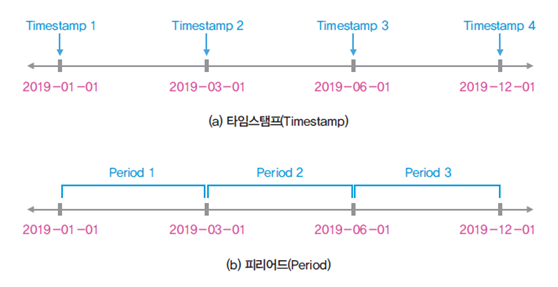  

In [70]:
# 간단한 주식데이터
df = pd.read_csv('/content/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


문자형 날자 데이터 -> timestamp로 변환
  - to_datetime()

In [72]:
df['new_date'] = pd.to_datetime(df['Date'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [74]:
df['new_date'][0]

Timestamp('2018-07-02 00:00:00')

In [75]:
df = df.set_index('new_date')
df = df.drop(columns=['Date'],axis=1)
df.head()

,Close,Start,High,Low,Volume
new_date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


Timestamp - Period 방식으로 변환

In [79]:
# 날자형식의 문자열로 구성되는 리스트 정의
dates = ['2021-01-01','2022-03-01','2023-06-01']
ts_dates = pd.to_datetime(dates)
ts_dates

DatetimeIndex(['2021-01-01', '2022-03-01', '2023-06-01'], dtype='datetime64[ns]', freq=None)

In [80]:
# timestamp를 period로 변환
per_day = ts_dates.to_period(freq='D')
print(per_day)
per_month = ts_dates.to_period(freq='M')
print(per_month)
per_year = ts_dates.to_period(freq='A') # 1년의 기간, 1년이 끝나는 12월을 기준
print(per_year)

PeriodIndex(['2021-01-01', '2022-03-01', '2023-06-01'], dtype='period[D]')
PeriodIndex(['2021-01', '2022-03', '2023-06'], dtype='period[M]')
PeriodIndex(['2021', '2022', '2023'], dtype='period[A-DEC]')


In [81]:
# 시계열 데이터 만들기

In [82]:
ts_ms =  pd.date_range(
    start='2023-01-01', # 시작
    end=None,
    periods=6, # 생성할 TimeStamp 개수
    freq = 'MS',# 시간간격
    tz = 'Asia/Seoul'
    )

In [83]:
ts_ms

DatetimeIndex(['2023-01-01 00:00:00+09:00', '2023-02-01 00:00:00+09:00',
               '2023-03-01 00:00:00+09:00', '2023-04-01 00:00:00+09:00',
               '2023-05-01 00:00:00+09:00', '2023-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [84]:
# Period 배열
pd.period_range(
    start='2023-01-01',
    end=None,
    periods=3,
    freq='M'
    )

PeriodIndex(['2023-01', '2023-02', '2023-03'], dtype='period[M]')

In [86]:
df = pd.read_csv('/content/stock-data.csv')
df['new_date']  = pd.to_datetime( df['Date'] )
df.head()

,Date,Close,Start,High,Low,Volume,new_date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [87]:
df['year'] = df['new_date'].dt.year
df['month'] = df['new_date'].dt.month
df['day'] = df['new_date'].dt.day
df.head()

,Date,Close,Start,High,Low,Volume,new_date,year,month,day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26


In [88]:
df['date_yr'] = df['new_date'].dt.to_period(freq='A')
df['date_m'] = df['new_date'].dt.to_period(freq='M')
df.head()

,Date,Close,Start,High,Low,Volume,new_date,year,month,day,date_yr,date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2,2018,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29,2018,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28,2018,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26,2018,2018-06


데이터 프레임 응용
  - apply 함수 : 개별원소에 함수 매핑

In [107]:
import seaborn as sns
titanic =  sns.load_dataset('titanic')
# age , fare 데이터만 DataFrame으로 추출
df = titanic.loc[:,['age','fare']]
df['ten'] = 10
df.head()

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


In [90]:
def add_10(n):
  return n+10

def add_two_obj(a,b):
  return a  + b

In [ ]:
df['age'].apply(add_10)

In [ ]:
df['age'].apply(add_two_obj,b=5)

In [93]:
# 람다로 표현하기

In [ ]:
df['age'].apply(lambda x: x+10)

In [ ]:
df['age'].apply(lambda x: x+5)

In [99]:
df.applymap(lambda x: x+10)

,age,fare,ten
0,32.0,17.2500,20
1,48.0,81.2833,20
2,36.0,17.9250,20
3,45.0,63.1000,20
4,45.0,18.0500,20
...,...,...,...
886,37.0,23.0000,20
887,29.0,40.0000,20
888,NaN,33.4500,20
889,36.0,40.0000,20


In [100]:
df.apply(lambda x: x+10)

,age,fare,ten
0,32.0,17.2500,20
1,48.0,81.2833,20
2,36.0,17.9250,20
3,45.0,63.1000,20
4,45.0,18.0500,20
...,...,...,...
886,37.0,23.0000,20
887,29.0,40.0000,20
888,NaN,33.4500,20
889,36.0,40.0000,20


In [101]:
df.apply(lambda x : x.isnull())

,age,fare,ten
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,True,False,False
889,False,False,False


In [104]:
df.apply(lambda x : x.max() - x.min())

age      79.5800
fare    512.3292
ten       0.0000
dtype: float64

In [110]:
df['age_fare_sum'] = df.apply(lambda x : x['age'] + x['fare'], axis=1 )

In [111]:
df

,age,fare,ten,age_fare_sum
0,22.0,7.2500,10,29.2500
1,38.0,71.2833,10,109.2833
2,26.0,7.9250,10,33.9250
3,35.0,53.1000,10,88.1000
4,35.0,8.0500,10,43.0500
...,...,...,...,...
886,27.0,13.0000,10,40.0000
887,19.0,30.0000,10,49.0000
888,NaN,23.4500,10,NaN
889,26.0,30.0000,10,56.0000


데이터 프레임 객체에 함수 매핑
  - DataFrame객체.pipe(매핑 함수)

In [112]:
df = sns.load_dataset('titanic')
df = df.loc[:,['age','fare']]

# 각 열의 nan 찾기
def missing_value(x):
  return x.isnull()

# 각 열의 nan 개수 반환
def missing_count(x):
  return missing_value(x).sum()

# 데이터 프레임의 총 nan개수
def total_number_missing(x):
  return missing_count(x).sum()




In [115]:
df.pipe(total_number_missing)

177